<a href="https://colab.research.google.com/github/varundubey2804/Titanic-Dataset-Profiling-Report/blob/main/Titanic_Dataset_Profiling_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [2]:
!git clone 'https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset'

Cloning into '21-Days-21-Projects-Dataset'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 14 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (14/14), 237.29 KiB | 3.04 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [3]:
titanic_df = pd.read_csv('/content/21-Days-21-Projects-Dataset/Datasets/Titanic-Dataset.csv')
print("First 5 rows of the dataset:")
titanic_df.head()

First 5 rows of the dataset:


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
titanic_df.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [5]:
titanic_df.shape

(891, 12)

In [6]:
print("\nDataset Information:")
titanic_df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
print("\nDescriptive Statistics:")
titanic_df.describe()


Descriptive Statistics:


PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [8]:
titanic_df['Cabin'].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [9]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
print("Missing values before cleaning:")
titanic_df.isna().sum()

Missing values before cleaning:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### **Theoretical Concept: Missing Value Imputation**

Imputation is the process of replacing missing data with substituted values. The strategy depends on the data type and its distribution:
- **Numerical Data:** For skewed distributions (like `Age` and `Fare`), using the **median** is more robust than the mean because it is not affected by outliers.
- **Categorical Data:** A common strategy is to fill with the **mode** (the most frequent value).
- **High Cardinality/Too Many Missing Values:** For columns like `Cabin`, where most data is missing, imputing might not be effective. We could either drop the column or engineer a new feature from it (e.g., `Has_Cabin`).

In [11]:
median = titanic_df['Age'].median()
print(median)

28.0


In [12]:
median_age = titanic_df['Age'].median()
titanic_df['Age'] = titanic_df['Age'].fillna(median_age)
print("Missing values after Age cleaning:")
print(titanic_df[['Age', 'Embarked', 'Cabin']].isna().sum())

Missing values after Age cleaning:
Age           0
Embarked      2
Cabin       687
dtype: int64


In [13]:
mode = titanic_df['Embarked'].mode()[0]
print(mode)

S


In [14]:
mode_embarked = titanic_df['Embarked'].mode()[0]
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(mode_embarked)
print("Missing values after Embarked cleaning:")
print(titanic_df[['Age', 'Embarked', 'Cabin']].isna().sum())

Missing values after Embarked cleaning:
Age           0
Embarked      0
Cabin       687
dtype: int64


In [15]:
titanic_df['Has_Cabin'] = titanic_df['Cabin'].notna().astype(int)
titanic_df.drop('Cabin', axis=1, inplace=True)

In [16]:
titanic_df['Has_Cabin'].value_counts()

Has_Cabin
0    687
1    204
Name: count, dtype: int64

In [17]:
titanic_df.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  Has_Cabin  
0      0         A/5 21171   7.2500        S          0  
1      0          PC 17599  71.2833        C          1  
2      0  STON/O2. 3101282   7.9250        S          0  
3      0            113803  53.1000        S          1  
4      0            373450   8.0500        S          0

In [18]:
print("Missing values after cleaning:")
titanic_df.isna().sum()

Missing values after cleaning:


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64

###  Univariate Analysis

We analyze each variable individually to understand its distribution.

#### **Theoretical Concept: Univariate Analysis**

This is the simplest form of data analysis, where the data being analyzed contains only one variable. The main purpose is to describe the data and find patterns within it.
- **For Categorical Variables:** We use frequency tables, bar charts (`countplot`), or pie charts to see the count or proportion of each category.
- **For Numerical Variables:** We use histograms (`histplot`) or kernel density plots (`kdeplot`) to understand the distribution, and box plots (`boxplot`) to identify the central tendency, spread, and outliers.

Analyzing categorical features:


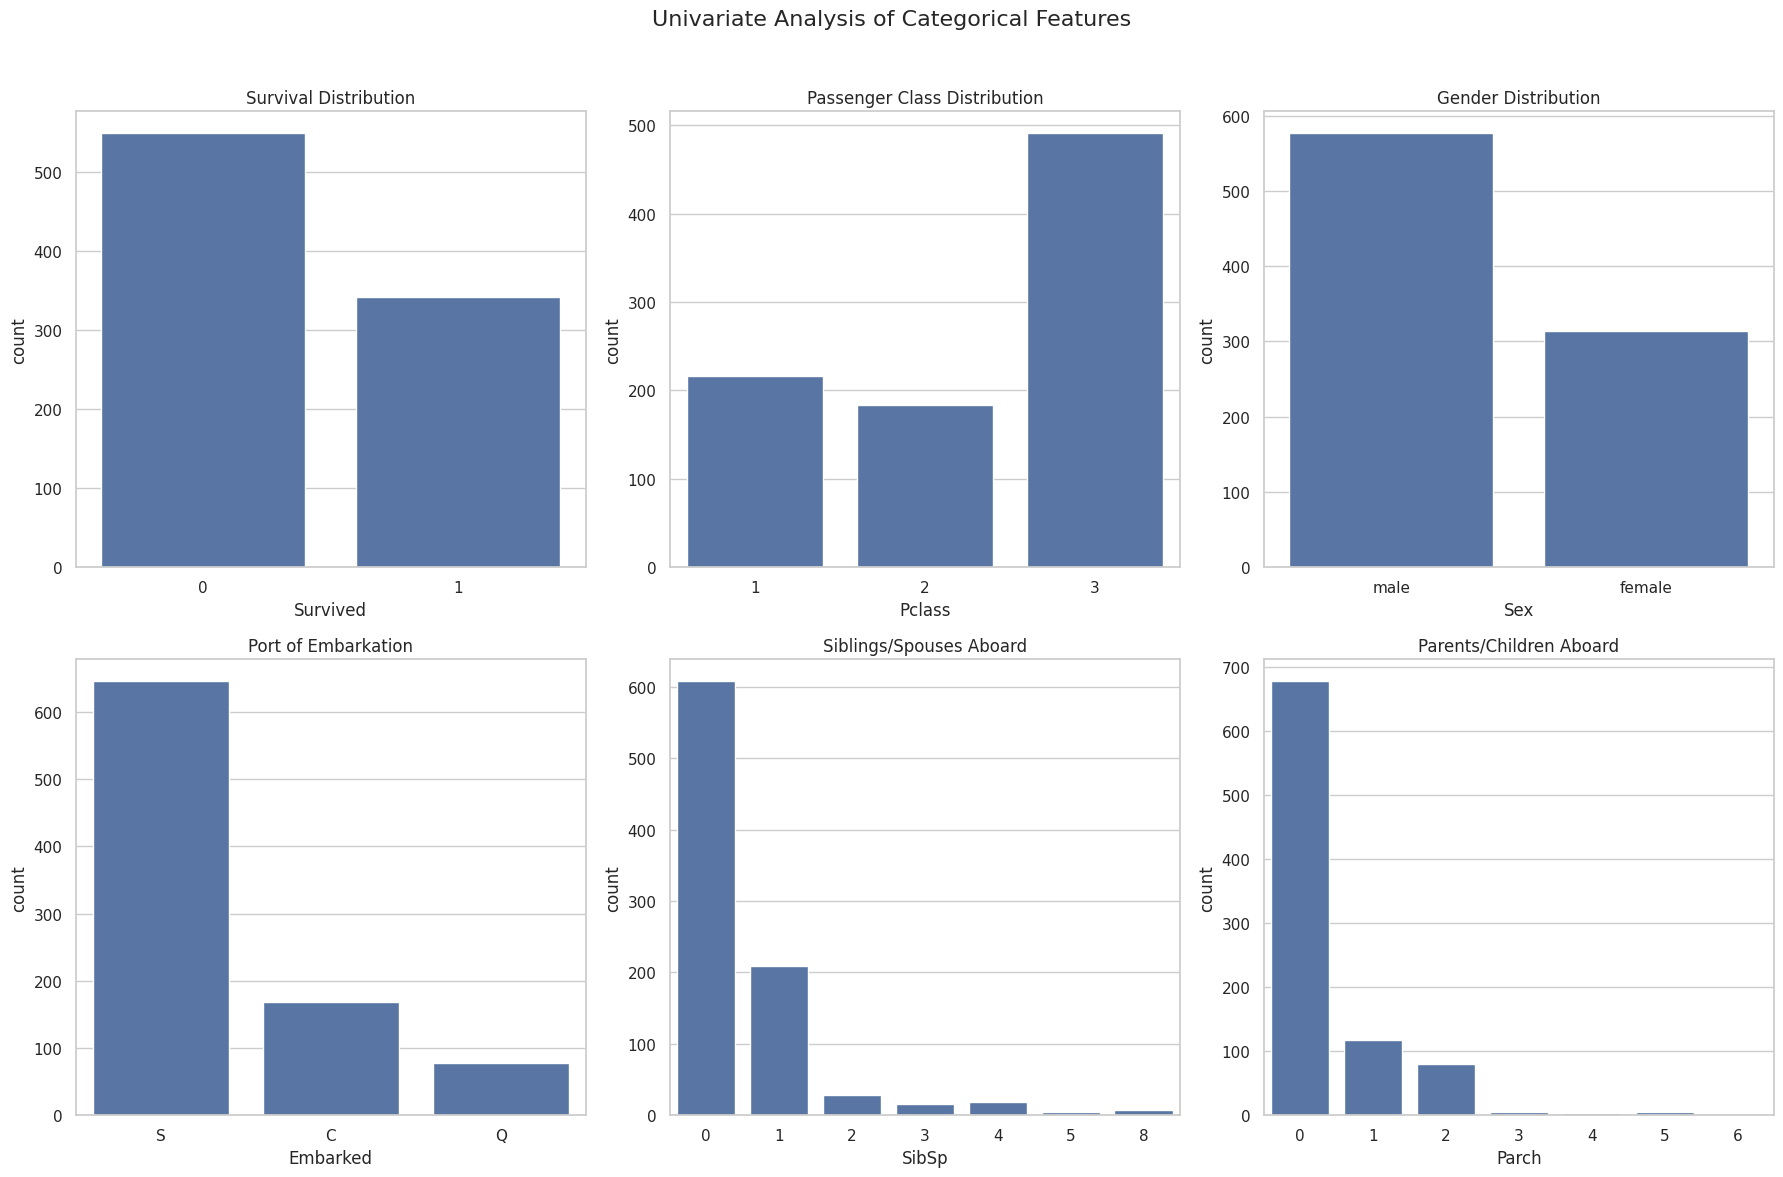

In [19]:
print("Analyzing categorical features:")
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Univariate Analysis of Categorical Features', fontsize=16)
sns.countplot(ax=axes[0, 0], x='Survived', data=titanic_df).set_title('Survival Distribution')
sns.countplot(ax=axes[0, 1], x='Pclass', data=titanic_df).set_title('Passenger Class Distribution')
sns.countplot(ax=axes[0, 2], x='Sex', data=titanic_df).set_title('Gender Distribution')
sns.countplot(ax=axes[1, 0], x='Embarked', data=titanic_df).set_title('Port of Embarkation')
sns.countplot(ax=axes[1, 1], x='SibSp', data=titanic_df).set_title('Siblings/Spouses Aboard')
sns.countplot(ax=axes[1, 2], x='Parch', data=titanic_df).set_title('Parents/Children Aboard')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Key Insights (Categorical):**
- **Survival:** Most passengers (over 500) did not survive.
- **Pclass:** The 3rd class was the most populated, followed by 1st and then 2nd.
- **Sex:** There were significantly more males than females.
- **Embarked:** The vast majority of passengers embarked from Southampton ('S').
- **SibSp & Parch:** Most passengers traveled alone.


Analyzing numerical features:


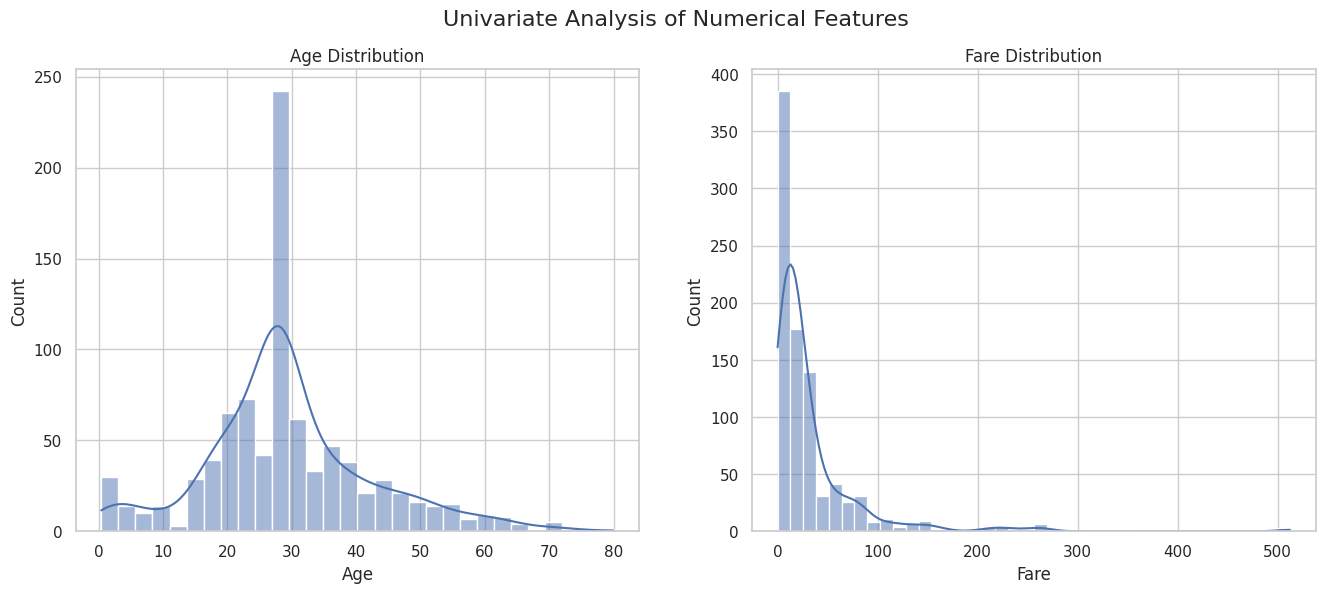

In [20]:
print("\nAnalyzing numerical features:")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Univariate Analysis of Numerical Features', fontsize=16)
sns.histplot(ax=axes[0], data=titanic_df, x='Age', kde=True, bins=30).set_title('Age Distribution')
sns.histplot(ax=axes[1], data=titanic_df, x='Fare', kde=True, bins=40).set_title('Fare Distribution')
plt.show()

###  Bivariate Analysis

Here, we explore the relationship between two variables. Our primary focus will be on how each feature relates to our target variable, `Survived`.

#### **Theoretical Concept: Bivariate Analysis**
This type of analysis involves two different variables, and its main purpose is to find relationships between them.
- **Categorical vs. Numerical:** To compare a numerical variable across different categories, we often use bar plots (`barplot`) that show the mean (or another estimator) of the numerical variable for each category. We can also use box plots or violin plots.
- **Categorical vs. Categorical:** We can use stacked bar charts or contingency tables (crosstabs).
- **Numerical vs. Numerical:** A scatter plot is the standard choice, with a correlation matrix being used to quantify the relationship.

Bivariate Analysis: Feature vs. Survival


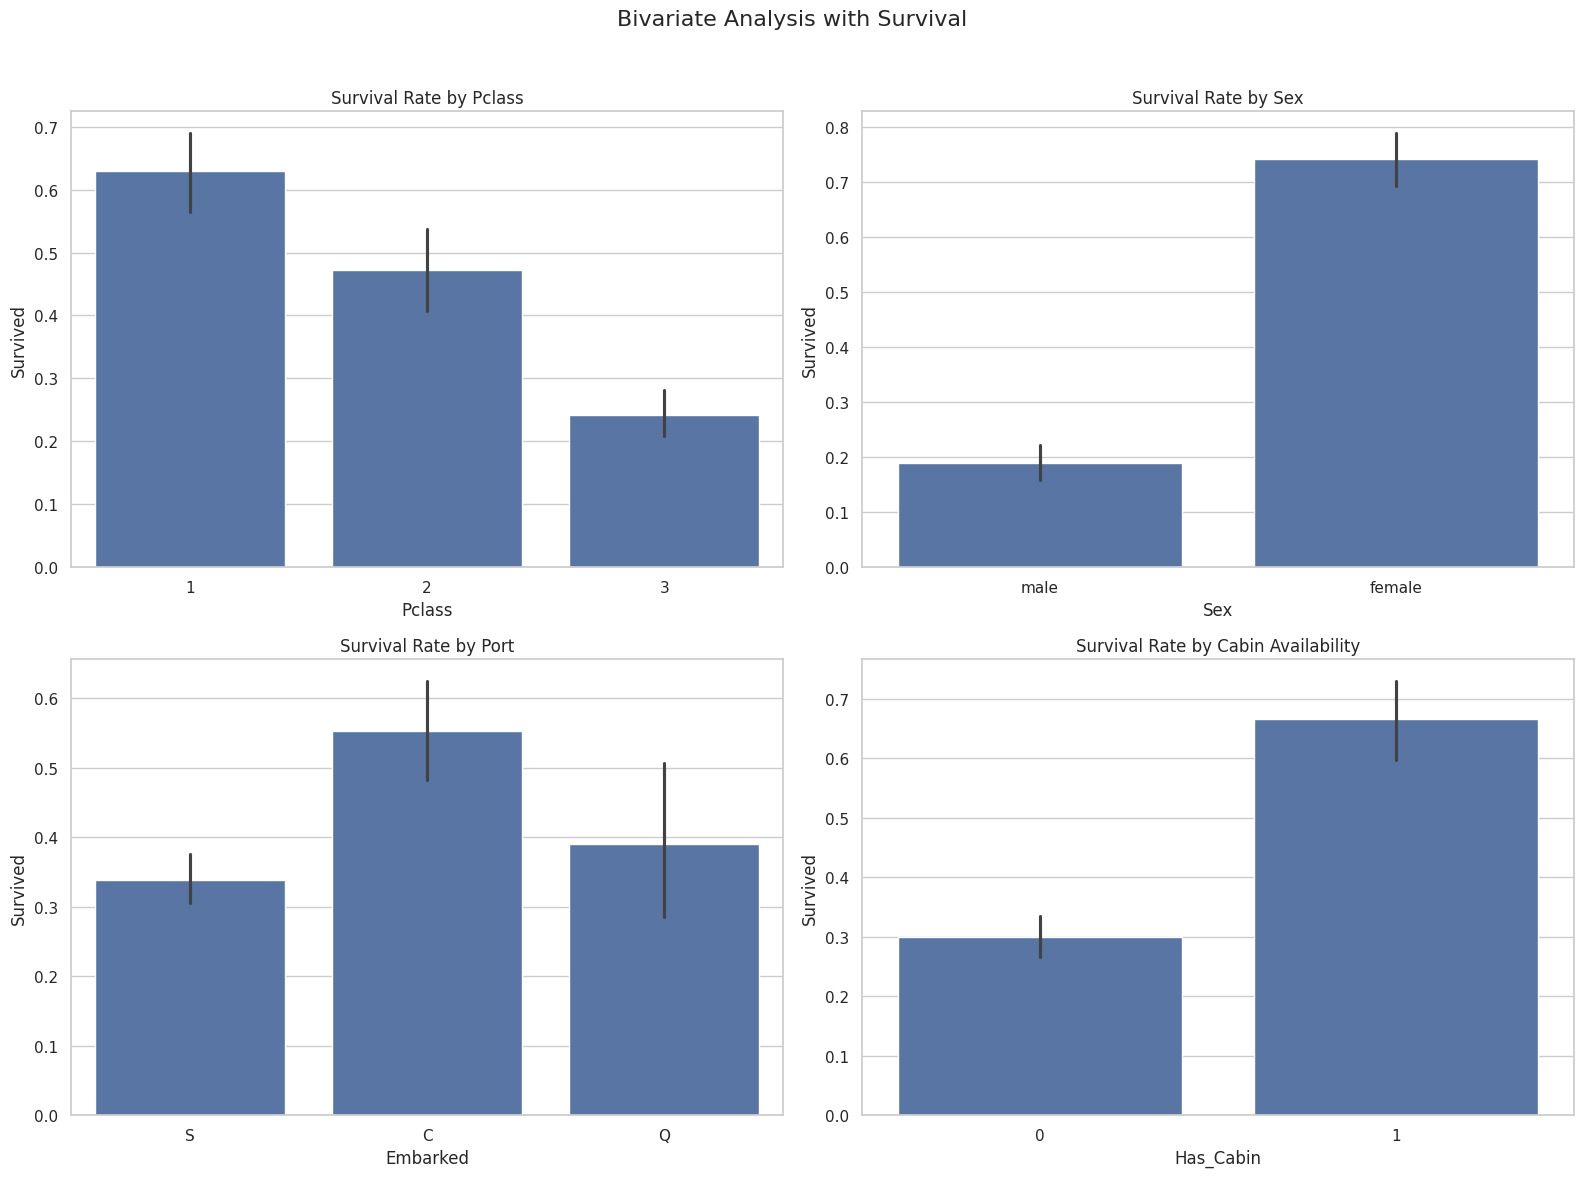

In [21]:
print("Bivariate Analysis: Feature vs. Survival")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Bivariate Analysis with Survival', fontsize=16)
sns.barplot(ax=axes[0, 0], x='Pclass', y='Survived', data=titanic_df).set_title('Survival Rate by Pclass')
sns.barplot(ax=axes[0, 1], x='Sex', y='Survived', data=titanic_df).set_title('Survival Rate by Sex')
sns.barplot(ax=axes[1, 0], x='Embarked', y='Survived', data=titanic_df).set_title('Survival Rate by Port')
sns.barplot(ax=axes[1, 1], x='Has_Cabin', y='Survived', data=titanic_df).set_title('Survival Rate by Cabin Availability')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Key Insights (Bivariate):**
- **Pclass:** A clear trend emerges: 1st class passengers had a >60% survival rate, while 3rd class passengers had less than 25%.
- **Sex:** This is the strongest predictor. Females had a survival rate of ~75%, while males had a rate below 20%.
- **Embarked:** Passengers embarking from Cherbourg ('C') had a higher survival rate than those from the other ports.
- **Has_Cabin:** Passengers with a registered cabin number had a much higher survival rate. This is likely correlated with being in 1st class.

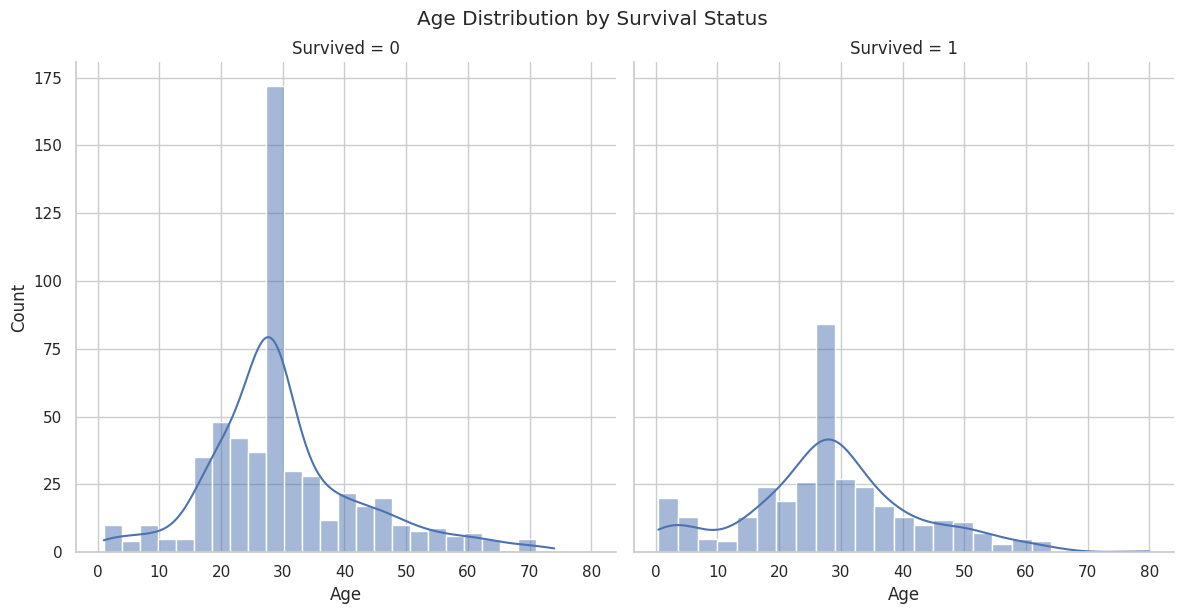

In [22]:
g = sns.FacetGrid(titanic_df, col='Survived', height=6)
g.map(sns.histplot, 'Age', bins=25, kde=True)
plt.suptitle('Age Distribution by Survival Status', y=1.02)
plt.show()

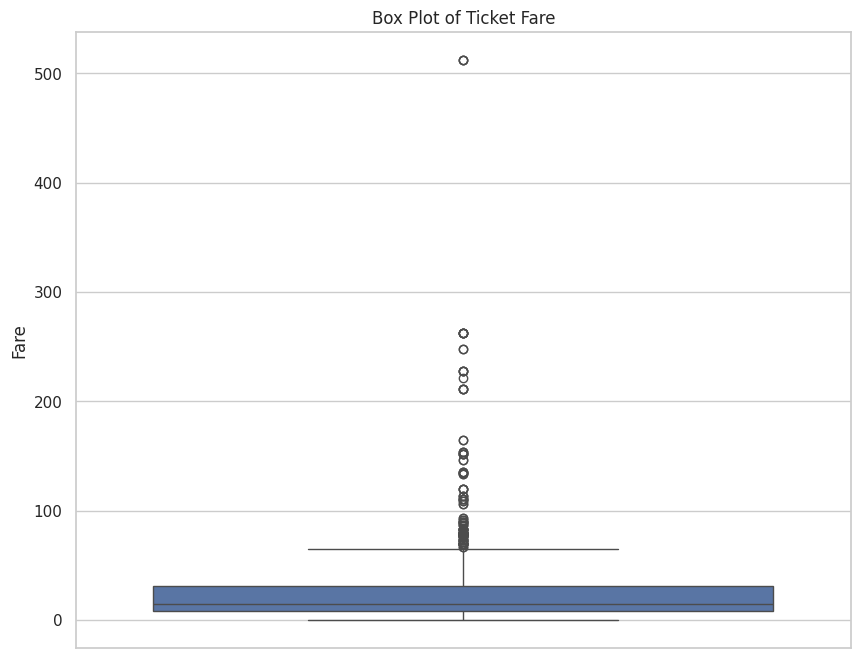

In [23]:
plt.figure(figsize=(10, 8))
sns.boxplot(y='Fare', data=titanic_df)
plt.title('Box Plot of Ticket Fare')
plt.ylabel('Fare')
plt.show()

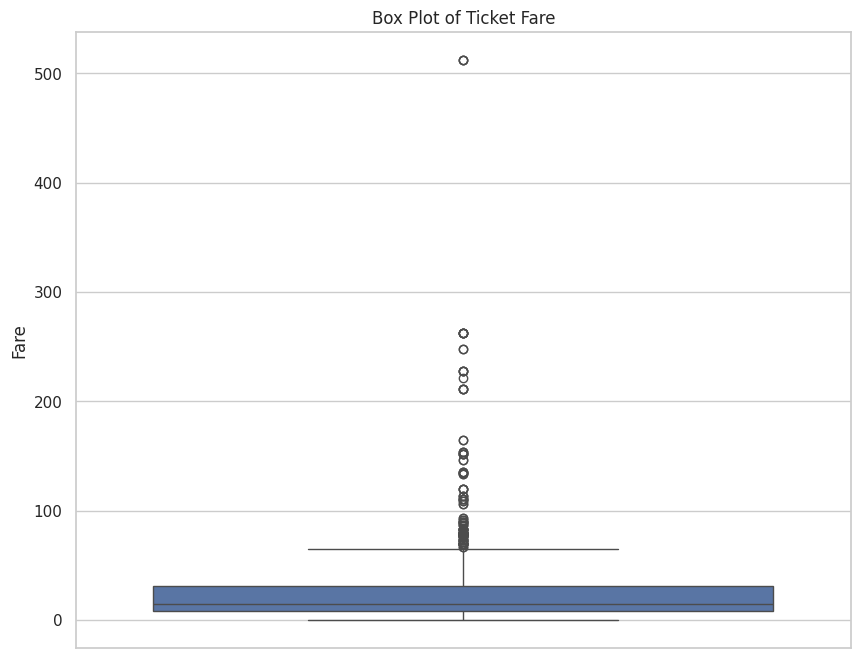

In [24]:
plt.figure(figsize=(10, 8))
sns.boxplot(y='Fare', data=titanic_df)
plt.title('Box Plot of Ticket Fare')
plt.ylabel('Fare')
plt.show()

###  Feature Engineering
Now, we'll create new features from the existing ones to potentially uncover deeper insights and provide more useful information for a machine learning model.

#### **Theoretical Concept: Feature Engineering**
Feature engineering is the process of using domain knowledge to extract features (characteristics, properties, attributes) from raw data. A good feature should be relevant to the problem and easy for a model to understand.

**Common Techniques:**
1.  **Combining Features:** Creating a new feature by combining others (e.g., `SibSp` + `Parch` = `FamilySize`).
2.  **Extracting from Text:** Pulling out specific information from a text feature (e.g., extracting titles from the `Name` column).
3.  **Binning:** Converting a continuous numerical feature into a categorical one (e.g., binning `Age` into groups like 'Child', 'Adult', 'Senior').

In [25]:
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
titanic_df['IsAlone'] = 0
titanic_df.loc[titanic_df['FamilySize'] == 1, 'IsAlone'] = 1
print("Created 'FamilySize' and 'IsAlone' features:")
titanic_df[['FamilySize', 'IsAlone']].head()

Created 'FamilySize' and 'IsAlone' features:


FamilySize  IsAlone
0           2        0
1           2        0
2           1        1
3           2        0
4           1        1

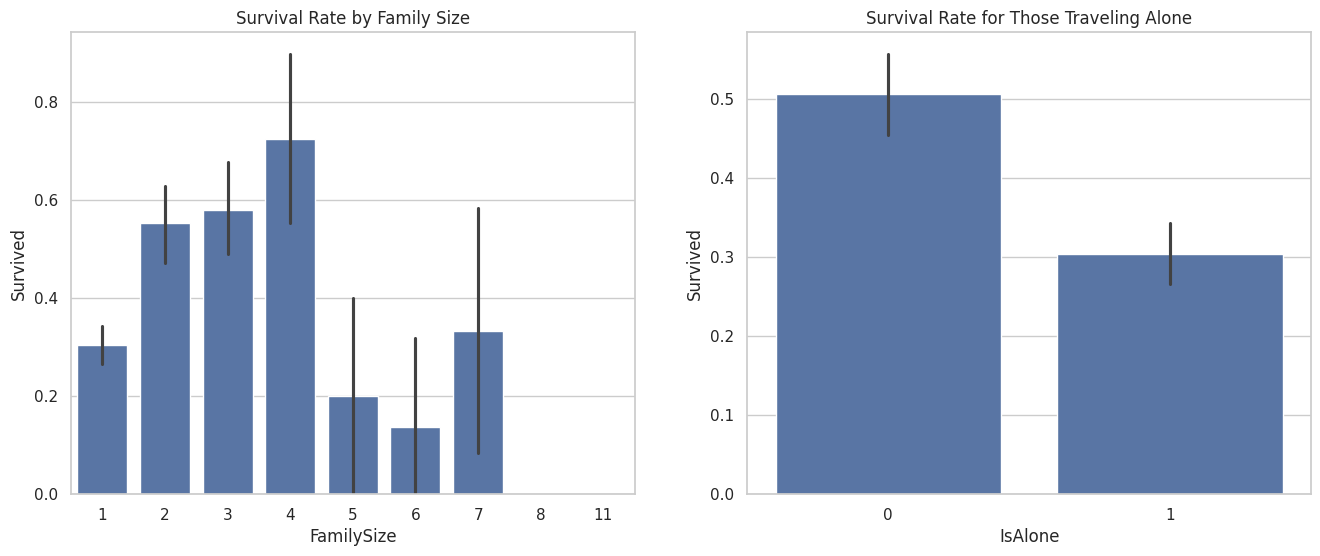

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(ax=axes[0], x='FamilySize', y='Survived', data=titanic_df).set_title('Survival Rate by Family Size')
sns.barplot(ax=axes[1], x='IsAlone', y='Survived', data=titanic_df).set_title('Survival Rate for Those Traveling Alone')
plt.show()

**Insight:**
- Passengers who were alone (`IsAlone=1`) had a lower survival rate (~30%) than those in small families.
- Small families of 2 to 4 members had the highest survival rates.
- Very large families (5 or more) had a very poor survival rate. This might be because it was harder for large families to stay together and evacuate.

* Matches a space.
* Titles in the names are usually preceded by a space.
([A-Za-z]+): This is the capturing group.
* [A-Za-z]+: Matches one or more uppercase or lowercase letters. This captures the title itself (like Mr, Mrs, Miss, etc.).
* \.: Matches a literal dot (.) which usually follows the title.

In [27]:
titanic_df['Title'] = titanic_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
print("Extracted Titles:")
titanic_df['Title'].value_counts()

Extracted Titles:


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

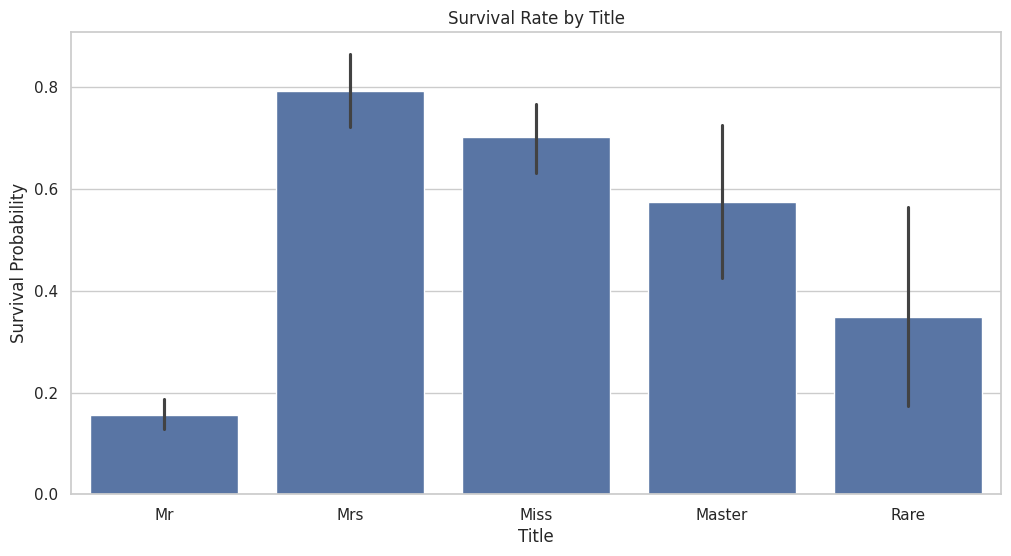

In [28]:
titanic_df['Title'] = titanic_df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
titanic_df['Title'] = titanic_df['Title'].replace('Mlle', 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Ms', 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Mme', 'Mrs')
plt.figure(figsize=(12, 6))
sns.barplot(x='Title', y='Survived', data=titanic_df)
plt.title('Survival Rate by Title')
plt.ylabel('Survival Probability')
plt.show()

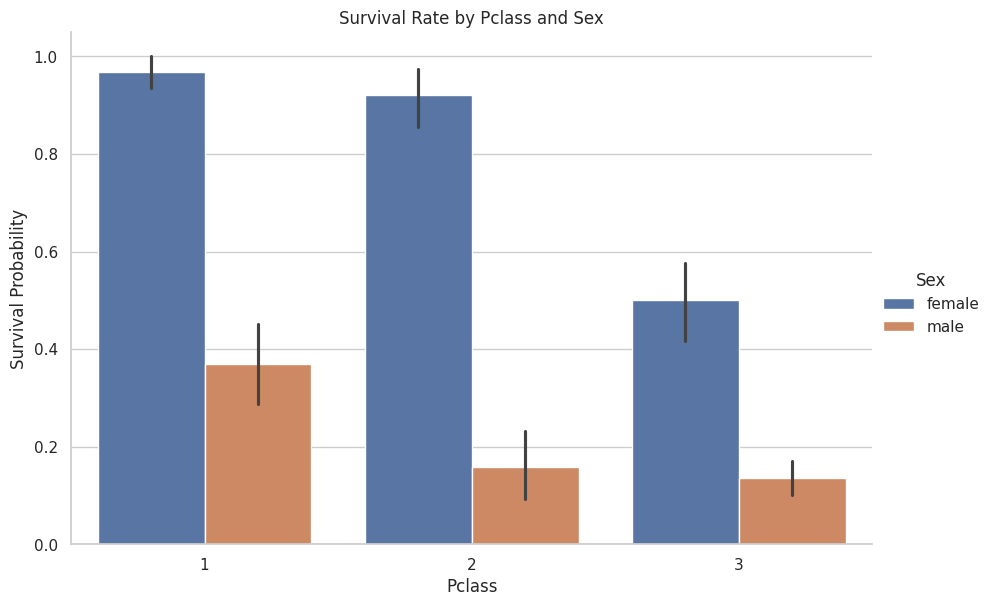

In [29]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df, kind='bar', height=6, aspect=1.5)
plt.title('Survival Rate by Pclass and Sex')
plt.ylabel('Survival Probability')
plt.show()

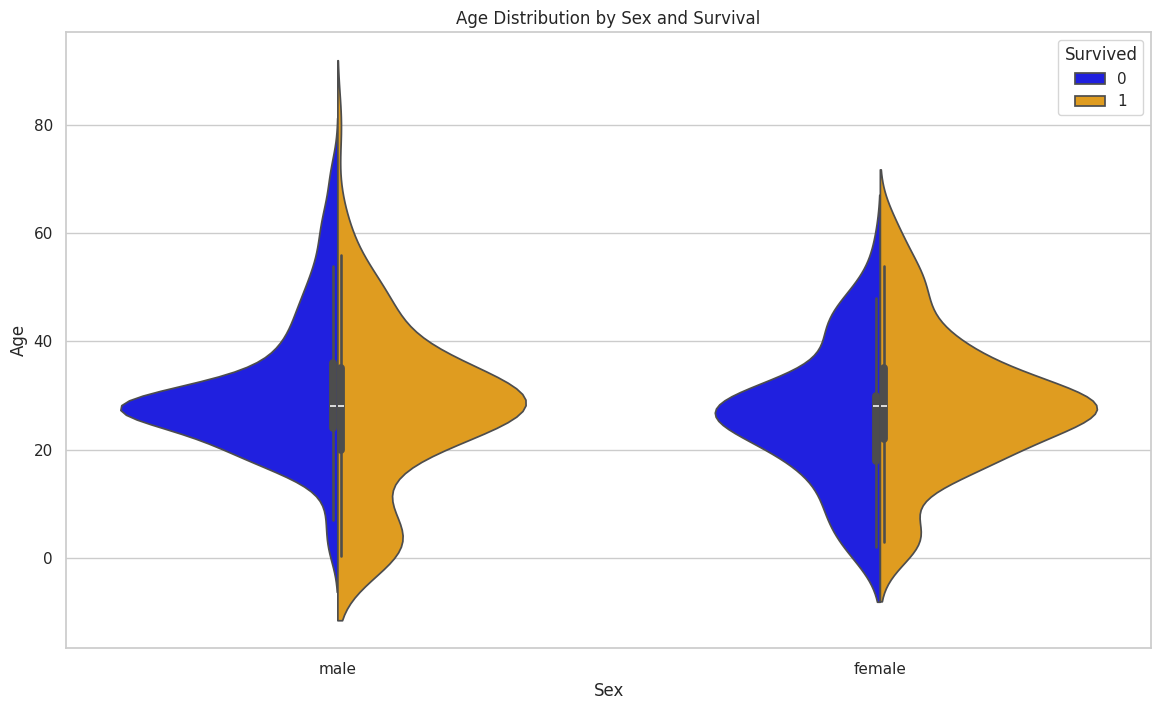

In [30]:
plt.figure(figsize=(14, 8))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=titanic_df, split=True, palette={0: 'blue', 1: 'orange'})
plt.title('Age Distribution by Sex and Survival')
plt.show()

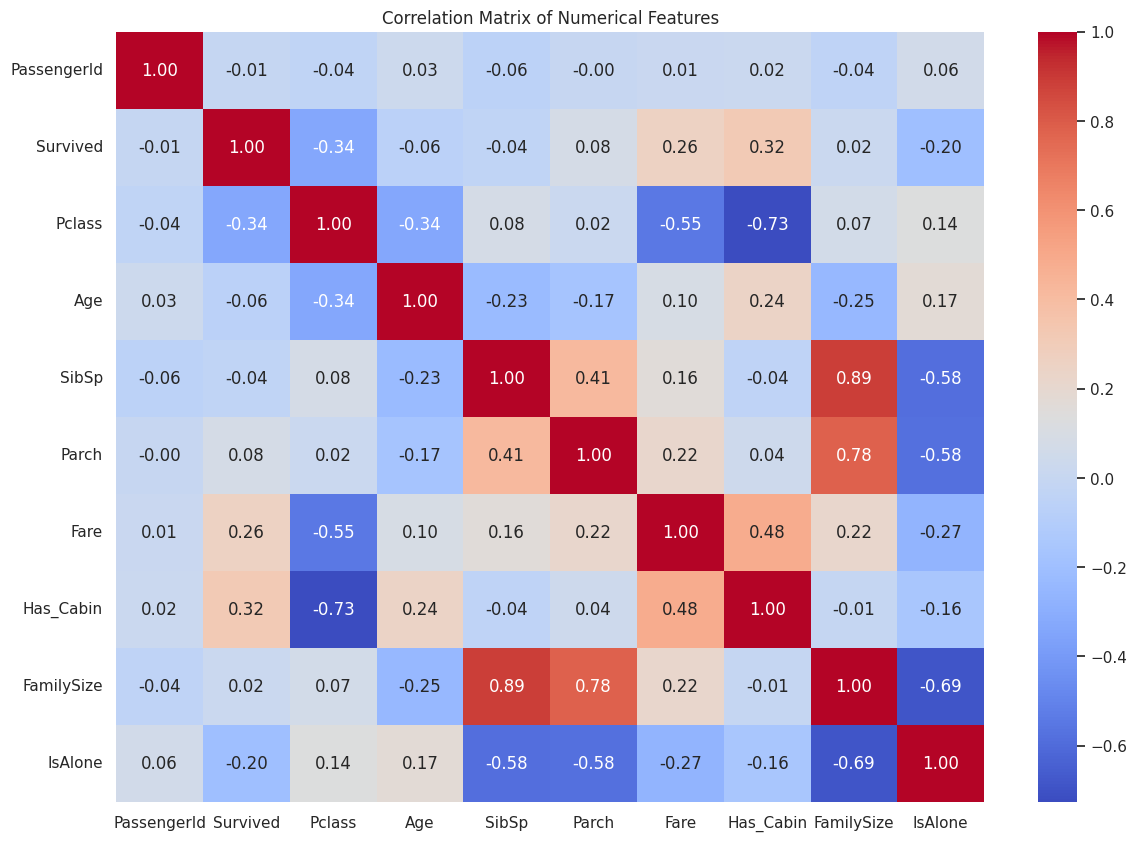

In [31]:
plt.figure(figsize=(14, 10))
numeric_cols = titanic_df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [32]:
import pandas as pd

# Create a sample DataFrame
sample_data = {'col1': [1, 2, 3, 4],
               'col2': ['A', 'B', 'C', 'D'],
               'col3': [True, False, True, False]}
sample_df = pd.DataFrame(sample_data)

# Display the sample DataFrame
print("Sample DataFrame:")
display(sample_df)

Sample DataFrame:


col1 col2   col3
0     1    A   True
1     2    B  False
2     3    C   True
3     4    D  False

In [33]:
!pip install ydata-profiling -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.2 MB/s eta 0:00:00


In [34]:
from ydata_profiling import ProfileReport

profile = ProfileReport(sample_df, title="Titanic Dataset Profiling Report")

# Display the report in the notebook
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)

100%|██████████| 3/3 [00:00<00:00, 173.64it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [35]:
profile.to_file("sample.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]